## Callbacks and mnist

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



In [3]:
#Loading the dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
# Create a DNN
def get_dnn_model():
    model = keras.Sequential([
       
        keras.layers.Flatten(input_shape=(28,28)), #Always use input_shape in your first layer (Makes debugging easier)
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])
    return model

dnn_model = get_dnn_model()


In [7]:
#Compile
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the model
history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/sample - loss: 2.8575 - accuracy: 0.8628 - val_loss: 0.5511 - val_accuracy: 0.8718
Epoch 2/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3880 - accuracy: 0.9108 - val_loss: 0.3615 - val_accuracy: 0.9150
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2758 - accuracy: 0.9303 - val_loss: 0.3018 - val_accuracy: 0.9287
Epoch 4/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2496 - accuracy: 0.9373 - val_loss: 0.2537 - val_accuracy: 0.9419
Epoch 5/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2350 - accuracy: 0.9410 - val_loss: 0.2659 - val_accuracy: 0.9355
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2112 - accuracy: 0.9468 - val_loss: 0.3033 - val_accuracy: 0.9382
Epoch 7/20
60000/60000 [==============================] 

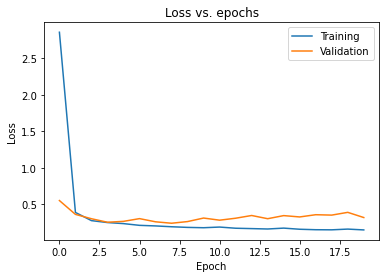

In [11]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Early stopping

The model does not much improve after about 8 epochs (and maybe even gets worse)
So we want to stop early. 

We have callbacks for this!


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

dnn_model = get_dnn_model()
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE

history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels), callbacks=[
     EarlyStopping(patience=2)
] ) # We get the history back

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/sample - loss: 2.5855 - accuracy: 0.8650 - val_loss: 0.5289 - val_accuracy: 0.8874
Epoch 2/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3847 - accuracy: 0.9119 - val_loss: 0.3701 - val_accuracy: 0.9085
Epoch 3/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2907 - accuracy: 0.9283 - val_loss: 0.2869 - val_accuracy: 0.9274
Epoch 4/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2508 - accuracy: 0.9370 - val_loss: 0.2474 - val_accuracy: 0.9417
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2392 - accuracy: 0.9427 - val_loss: 0.2809 - val_accuracy: 0.9361
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2094 - accuracy: 0.9482 - val_loss: 0.2135 - val_accuracy: 0.9431
Epoch 7/20
60000/60000 [==============================] 

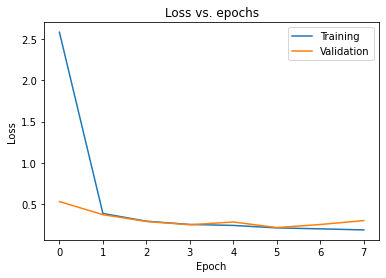

In [15]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Saving the models

Another callback is the saving models callback. This is used for saving models, handy to use in long training sequences to make sure that you have a backup of your model


In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint

dnn_model = get_dnn_model()
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE

checkpoint_path = 'model_checkpoint\checkpoint_{epoch:02d}' 
checkpoint_callback = ModelCheckpoint(
                        filepath=checkpoint_path,
                        save_freq='epoch', #How often you want to save
                        verbose=1,
                        save_weights_only=True #Can be set to False (default) if you only want to save the weights and not the architecture
                    )

history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels), callbacks=[
     checkpoint_callback
] ) # We get the history back

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59168/60000 [============================>.] - ETA: 0s - loss: 2.6349 - accuracy: 0.8636
Epoch 00001: saving model to model_checkpoint\checkpoint_01
60000/60000 [==============================] - 2s 32us/sample - loss: 2.6054 - accuracy: 0.8639 - val_loss: 0.4962 - val_accuracy: 0.8888
Epoch 2/10
59328/60000 [============================>.] - ETA: 0s - loss: 0.3879 - accuracy: 0.9125
Epoch 00002: saving model to model_checkpoint\checkpoint_02
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3874 - accuracy: 0.9124 - val_loss: 0.3128 - val_accuracy: 0.9178
Epoch 3/10
58528/60000 [============================>.] - ETA: 0s - loss: 0.2821 - accuracy: 0.9268
Epoch 00003: saving model to model_checkpoint\checkpoint_03
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2820 - accuracy: 0.9268 - val_loss: 0.2871 - val_accuracy: 0.9270
Epoch 4/10
59296/60000 [============================>.] 

In [50]:
dnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.2803 - accuracy: 0.9462


[0.2802983830359444, 0.9462]

In [51]:
#Load the model
from tensorflow.keras.models import load_model
loaded_dnn_model = get_dnn_model()
loaded_dnn_model.load_weights("model_checkpoint\checkpoint_10")


In [52]:
loaded_dnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.2803 - accuracy: 0.9462


[0.2802983830359444, 0.9462]

In [53]:
loaded_dnn_model.loss

In [85]:
from tensorflow.keras.callbacks import ModelCheckpoint

dnn_model = get_dnn_model()
dnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) #Can add more (or custom) e.g.: MSE

best_checkpoint_path = 'best_model_checkpoint' 
best_checkpoint_callback = ModelCheckpoint(
                        filepath=best_checkpoint_path,
                        save_freq='epoch', #How often you want to save
                        save_best_only=True,
                        monitor='val_accuracy',
                        verbose=1,
                        save_weights_only=False #Can be set to False (default) if you only want to save the weights and not the architecture
                    )

history = dnn_model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels), callbacks=[
     best_checkpoint_callback
] ) # We get the history back

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59712/60000 [============================>.] - ETA: 0s - loss: 2.5565 - accuracy: 0.8573
Epoch 00001: val_accuracy improved from -inf to 0.89200, saving model to best_model_checkpoint
INFO:tensorflow:Assets written to: best_model_checkpoint\assets
60000/60000 [==============================] - 2s 35us/sample - loss: 2.5457 - accuracy: 0.8576 - val_loss: 0.4575 - val_accuracy: 0.8920
Epoch 2/10
57920/60000 [===========================>..] - ETA: 0s - loss: 0.3793 - accuracy: 0.9068
Epoch 00002: val_accuracy improved from 0.89200 to 0.91230, saving model to best_model_checkpoint
INFO:tensorflow:Assets written to: best_model_checkpoint\assets
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3779 - accuracy: 0.9072 - val_loss: 0.3783 - val_accuracy: 0.9123
Epoch 3/10
58720/60000 [============================>.] - ETA: 0s - loss: 0.2905 - accuracy: 0.9261
Epoch 00003: val_accuracy improved from 0.91230 to 0.

In [86]:
loaded_dnn_model = load_model("best_model_checkpoint")

In [87]:
dnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 17us/sample - loss: 0.2987 - accuracy: 0.9494


[0.2987486907524406, 0.9494]

In [88]:
dnn_model.loss

In [89]:
loaded_dnn_model.loss

In [90]:
loaded_dnn_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.2587 - accuracy: 0.9494


[0.25865899575696094, 0.9494]